In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the processed CSV file
df = pd.read_csv("../data/processed/part-00000-55078bd3-eca0-4078-8064-721c27ee24fc-c000.csv",on_bad_lines='skip')

In [8]:
# Display basic info
print("Basic Information:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   author         2149 non-null   object 
 1   comment        2139 non-null   object 
 2   likes          2121 non-null   object 
 3   published_at   2119 non-null   object 
 4   total_replies  2104 non-null   float64
dtypes: float64(1), object(4)
memory usage: 84.1+ KB
None

First 5 rows:
             author                                            comment likes  \
0         @bgstmeme             FUCK PHYSICS WE'RE HERE FOR THE ACTION     0   
1  @CanineLupus0114  Imagine your personality and plot armor extend...     0   
2      @mayajarn678  Gotta admit she plays a pretty good villain twice     0   
3     @SerriHuesita  https://youtu.be/8IiAm7KUuoY?si=Mdj3N0ZNBgba4R...     0   
4   @collinmason739                           Random Citizen, my car.😅     0   

           pu

In [9]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
author            0
comment          10
likes            28
published_at     30
total_replies    45
dtype: int64


In [10]:
# Convert 'published_at' to datetime
df['published_at'] = pd.to_datetime(df['published_at'], errors='coerce')


In [11]:
# Top 10 most liked comments
most_liked = df.sort_values(by='likes', ascending=False).head(10)
print("\nTop 10 Most Liked Comments:")
print(most_liked[['author', 'comment', 'likes']])



Top 10 Most Liked Comments:
                       author  \
1157        @muhammadghani241   
1000                     -Dom   
1640              @Grey-ri4ud   
1655          @willbebexxsoon   
1541            @beatking2728   
2121              @Latexghost   
667   @Werdnasemajjamesandrew   
1980            @AnkurJhavery   
1300         @mindyourgamesyt   
1838                 @xxDROCK   

                                                comment likes  
1157        1:38 little nobody clearly lost the mind 😂😂    99  
1000                                       apparently."   972  
1640                                         7:01 : 😵‍💫     9  
1655  2:02 dom pulled 2005 nfs most wanted move and ...     9  
1541  4:30 guy in front of dom clearly don't know ho...     9  
2121  You guys did the drift dirty on this one. I ho...     9  
667   Unlimited horsepower means nothing compared to...    88  
1980  Only Dom can do this. Destroyed plenty of shop...   877  
1300  He’s a talented racer, an

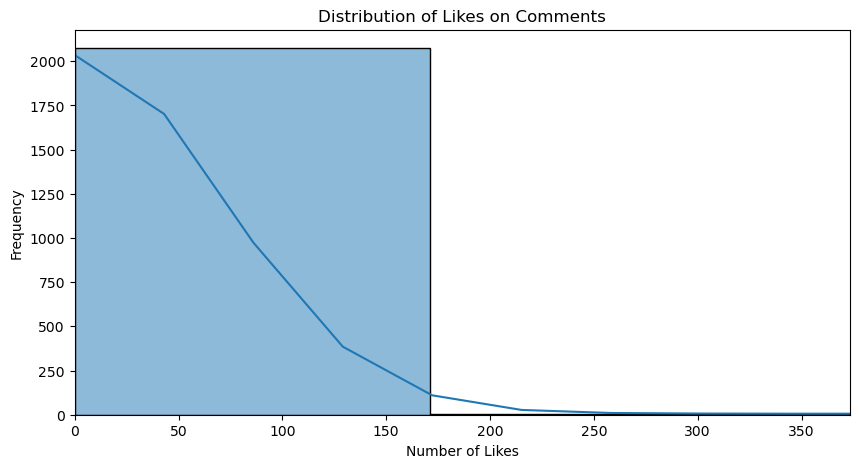

In [14]:
# Convert 'likes' to numeric, forcing errors to NaN
df['likes'] = pd.to_numeric(df['likes'], errors='coerce')

# Plot distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['likes'].dropna(), bins=50, kde=True)
plt.title("Distribution of Likes on Comments")
plt.xlabel("Number of Likes")
plt.ylabel("Frequency")
plt.xlim(0, df['likes'].quantile(0.99))  # Limit outliers
plt.show()

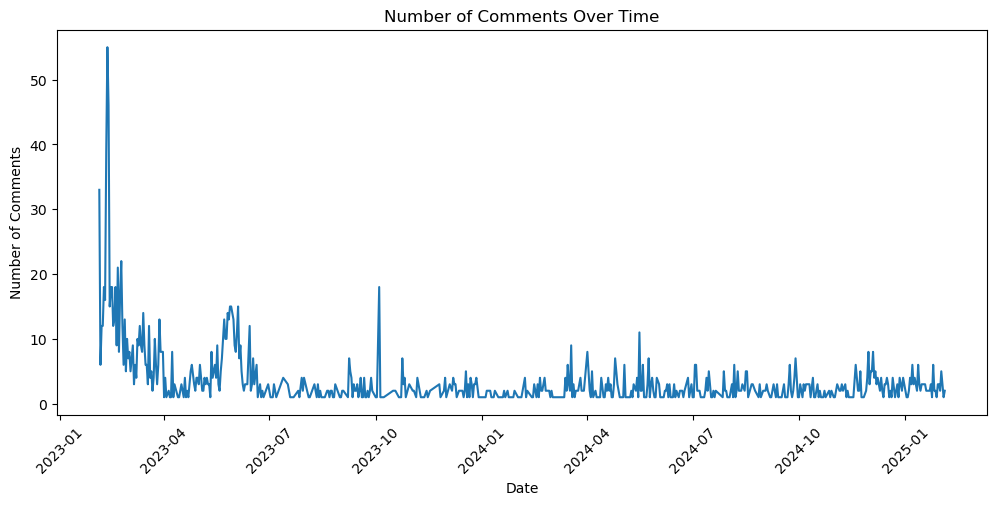

In [15]:
# Comments over time
plt.figure(figsize=(12, 5))
df['published_at'].dt.date.value_counts().sort_index().plot(kind='line')
plt.title("Number of Comments Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Comments")
plt.xticks(rotation=45)
plt.show()

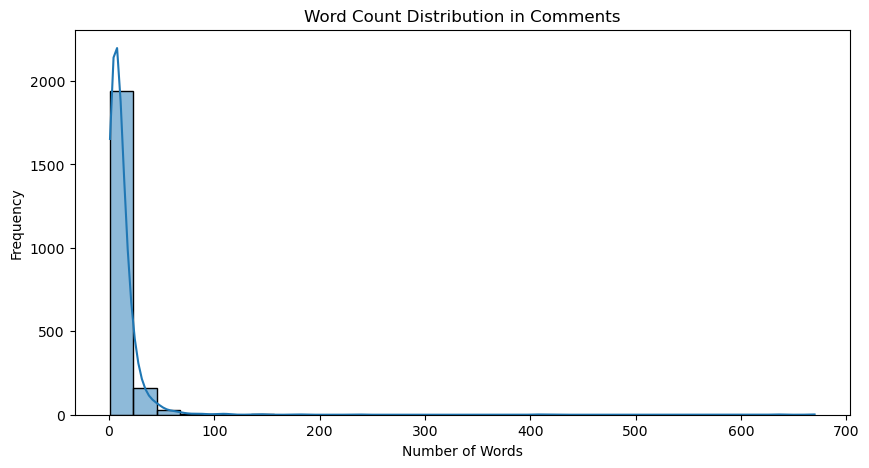

In [16]:
# Word count distribution
df['word_count'] = df['comment'].astype(str).apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 5))
sns.histplot(df['word_count'], bins=30, kde=True)
plt.title("Word Count Distribution in Comments")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()